In [212]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [213]:
df=pd.read_csv("D:\DATA_SCIENCE\ALGORITHMS\MACHINE_LEARNING_ALGORITHMS\Live_sellers_k-means.csv")

In [214]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [215]:
df.shape

(7050, 16)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [217]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [218]:
#Drop those 4 columns
df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)

In [219]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [221]:
#There are 3 categorical variables (or) objects
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [222]:
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [223]:
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [224]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [225]:
len(df['status_id'].unique())

6997

In [226]:
len(df['status_published'].unique())

6913

In [227]:
len(df['status_type'].unique())

4

In [228]:
#They are in-total 7050 id's are there and the unique values are 6997 so,we going to drop this status_id which is not requried!
#Here we going to drop status_id and status_published from the dataset!
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [229]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [230]:
X = df
y = df['status_type']

In [231]:
X

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [232]:
def same(x):
    return x

In [233]:
numeric=['num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys']
from sklearn.preprocessing import FunctionTransformer
no_one=FunctionTransformer(same)

In [234]:
class mod_labelEncoder(LabelEncoder):
    def fit_transform(self,y,*args,**kwargs):
        return super().fit_transform(y).reshape(-1,1)

In [235]:
#column Transformer
preprocessor=ColumnTransformer([('label',mod_labelEncoder(),'status_type'),
                                ('no_change',no_one,numeric)
                               ])

In [236]:
preprocessor

ColumnTransformer(transformers=[('label', mod_labelEncoder(), 'status_type'),
                                ('no_change',
                                 FunctionTransformer(func=<function same at 0x0000022039357240>),
                                 ['num_reactions', 'num_comments', 'num_shares',
                                  'num_likes', 'num_loves', 'num_wows',
                                  'num_hahas', 'num_sads', 'num_angrys'])])

In [237]:
print(X.columns)

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')


In [238]:
p=preprocessor.fit_transform(X)

In [239]:
data=pd.DataFrame(data=p,columns=['status_type','num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys'])

In [240]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [241]:
data['status_type'].unique()

array([3, 1, 0, 2], dtype=int64)

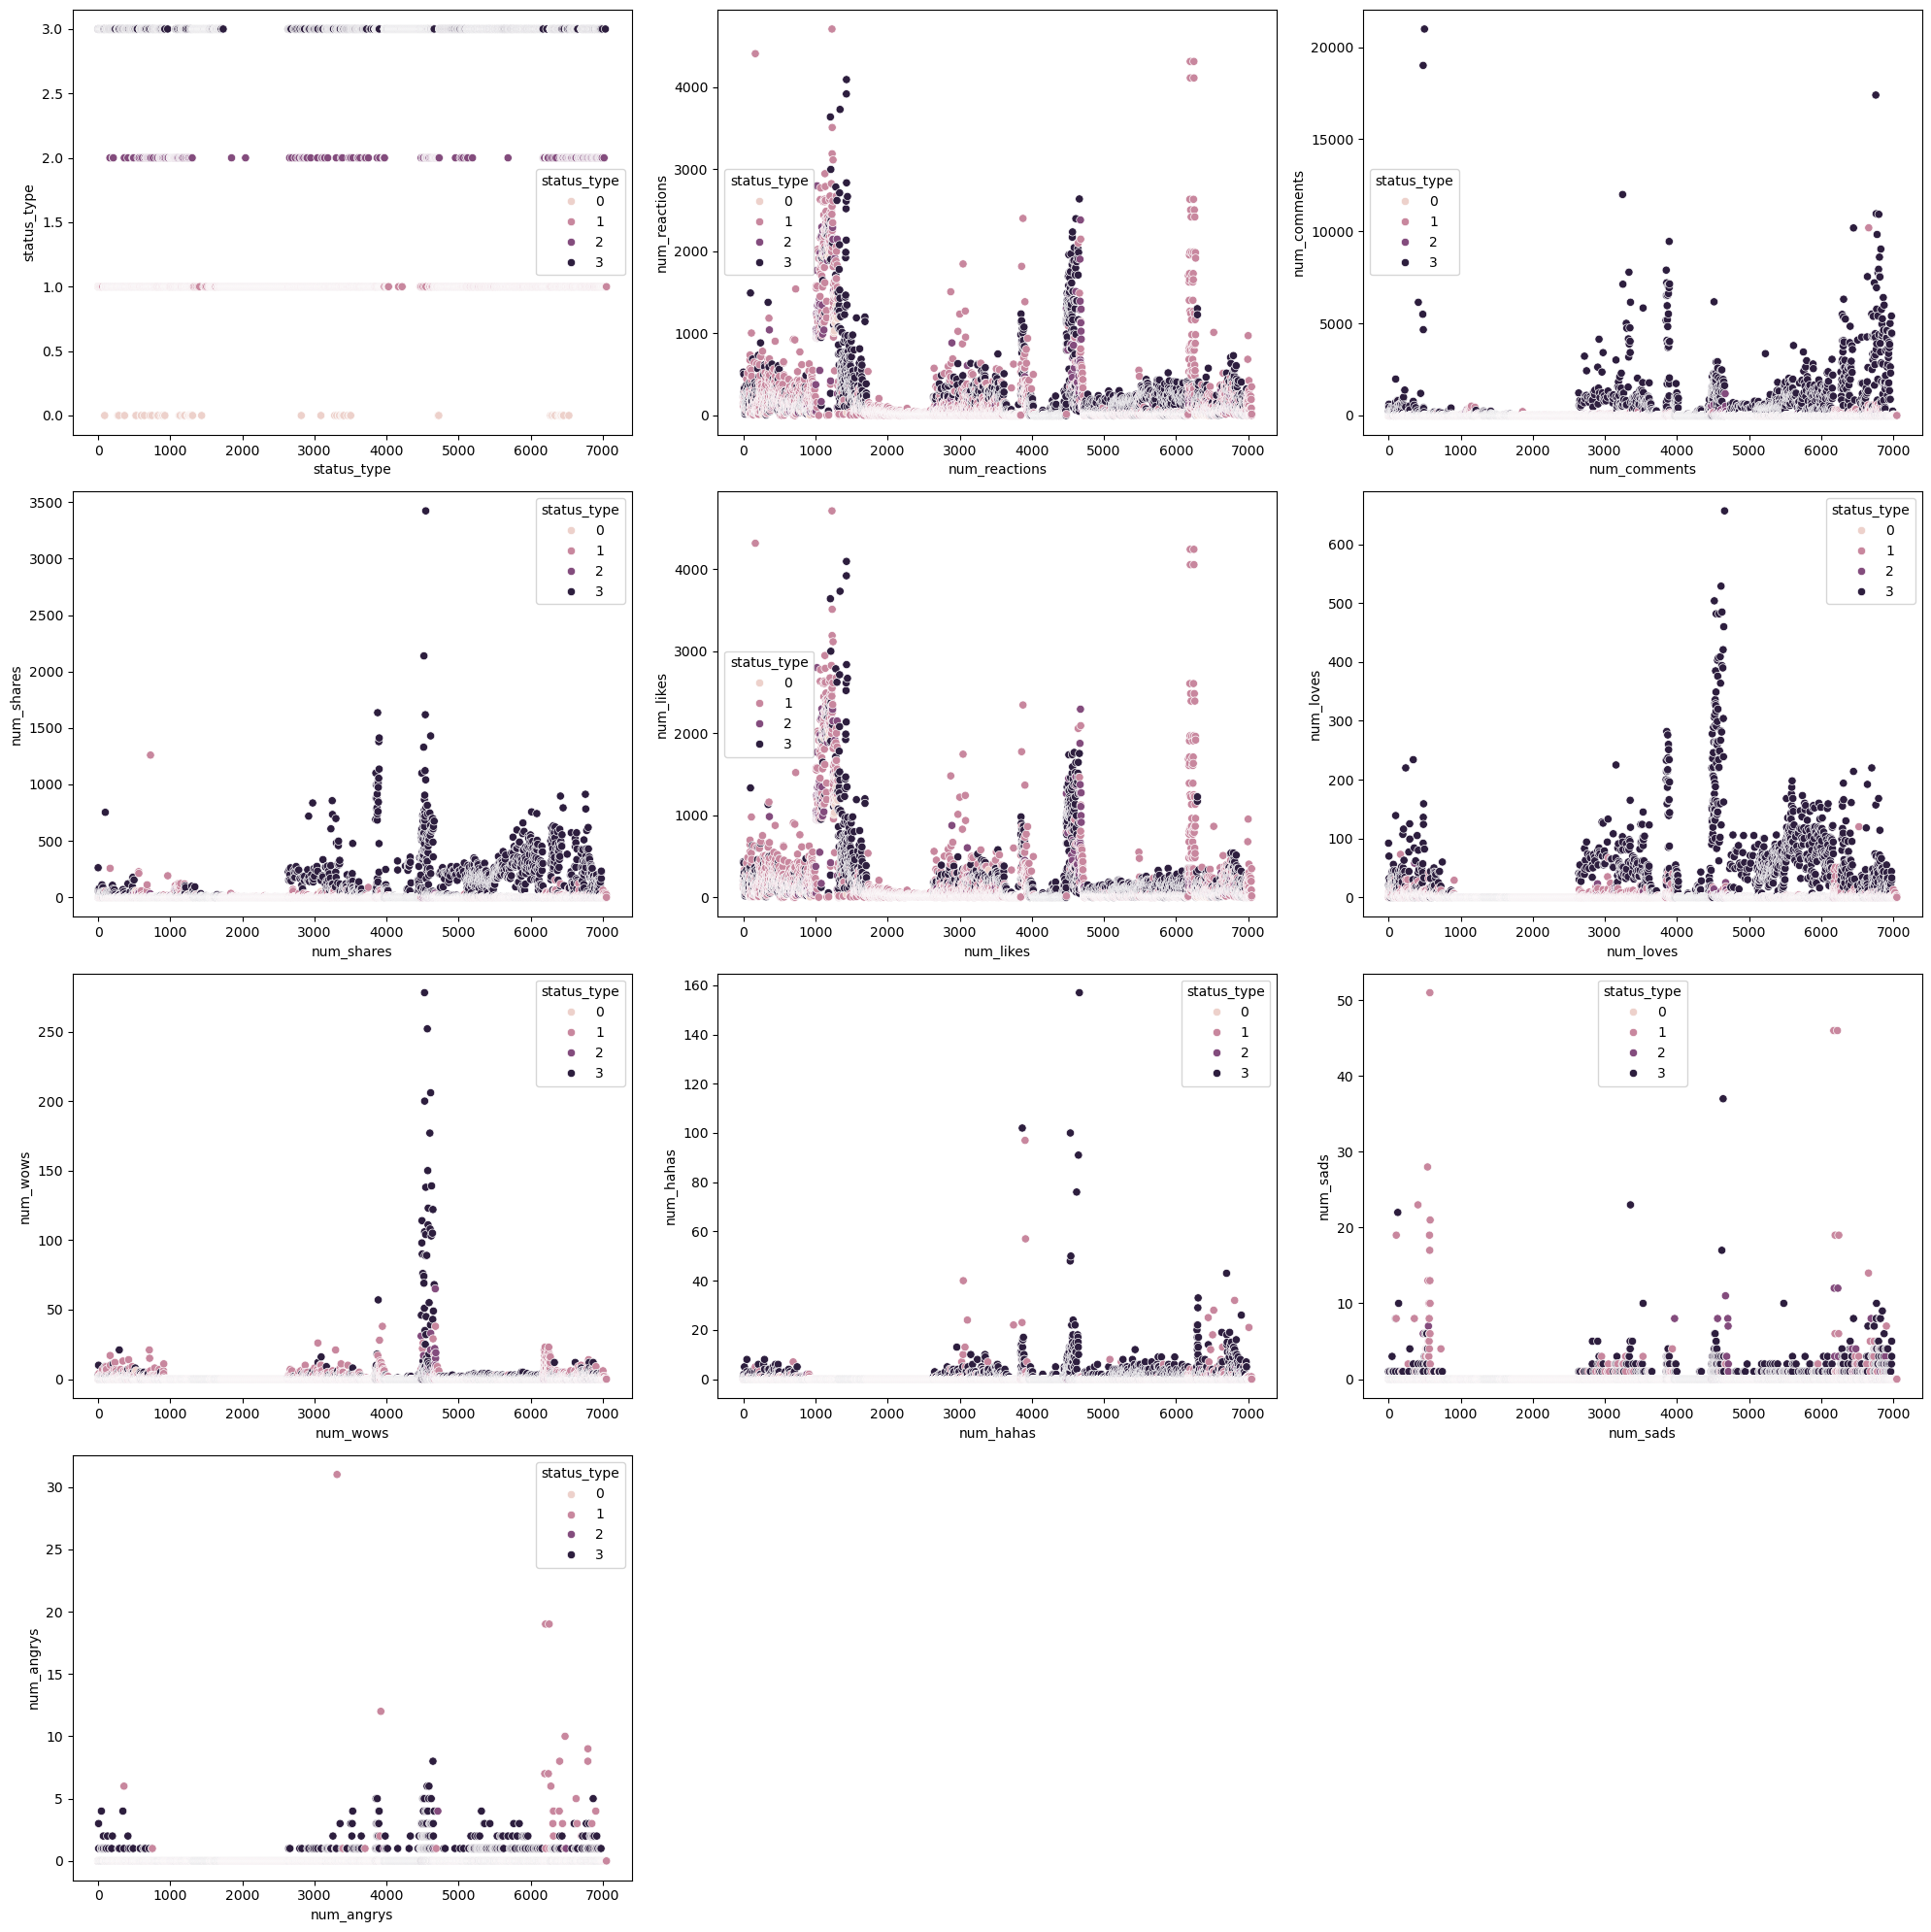

In [242]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
plot = 1
for i in data.columns[:10]:  
    ax = plt.subplot(4, 3, plot)
    sns.scatterplot(x=range(len(data['status_type'])), y=data[i],hue=data['status_type'])
    plt.xlabel(i)
    plot += 1
plt.tight_layout()
plt.show()

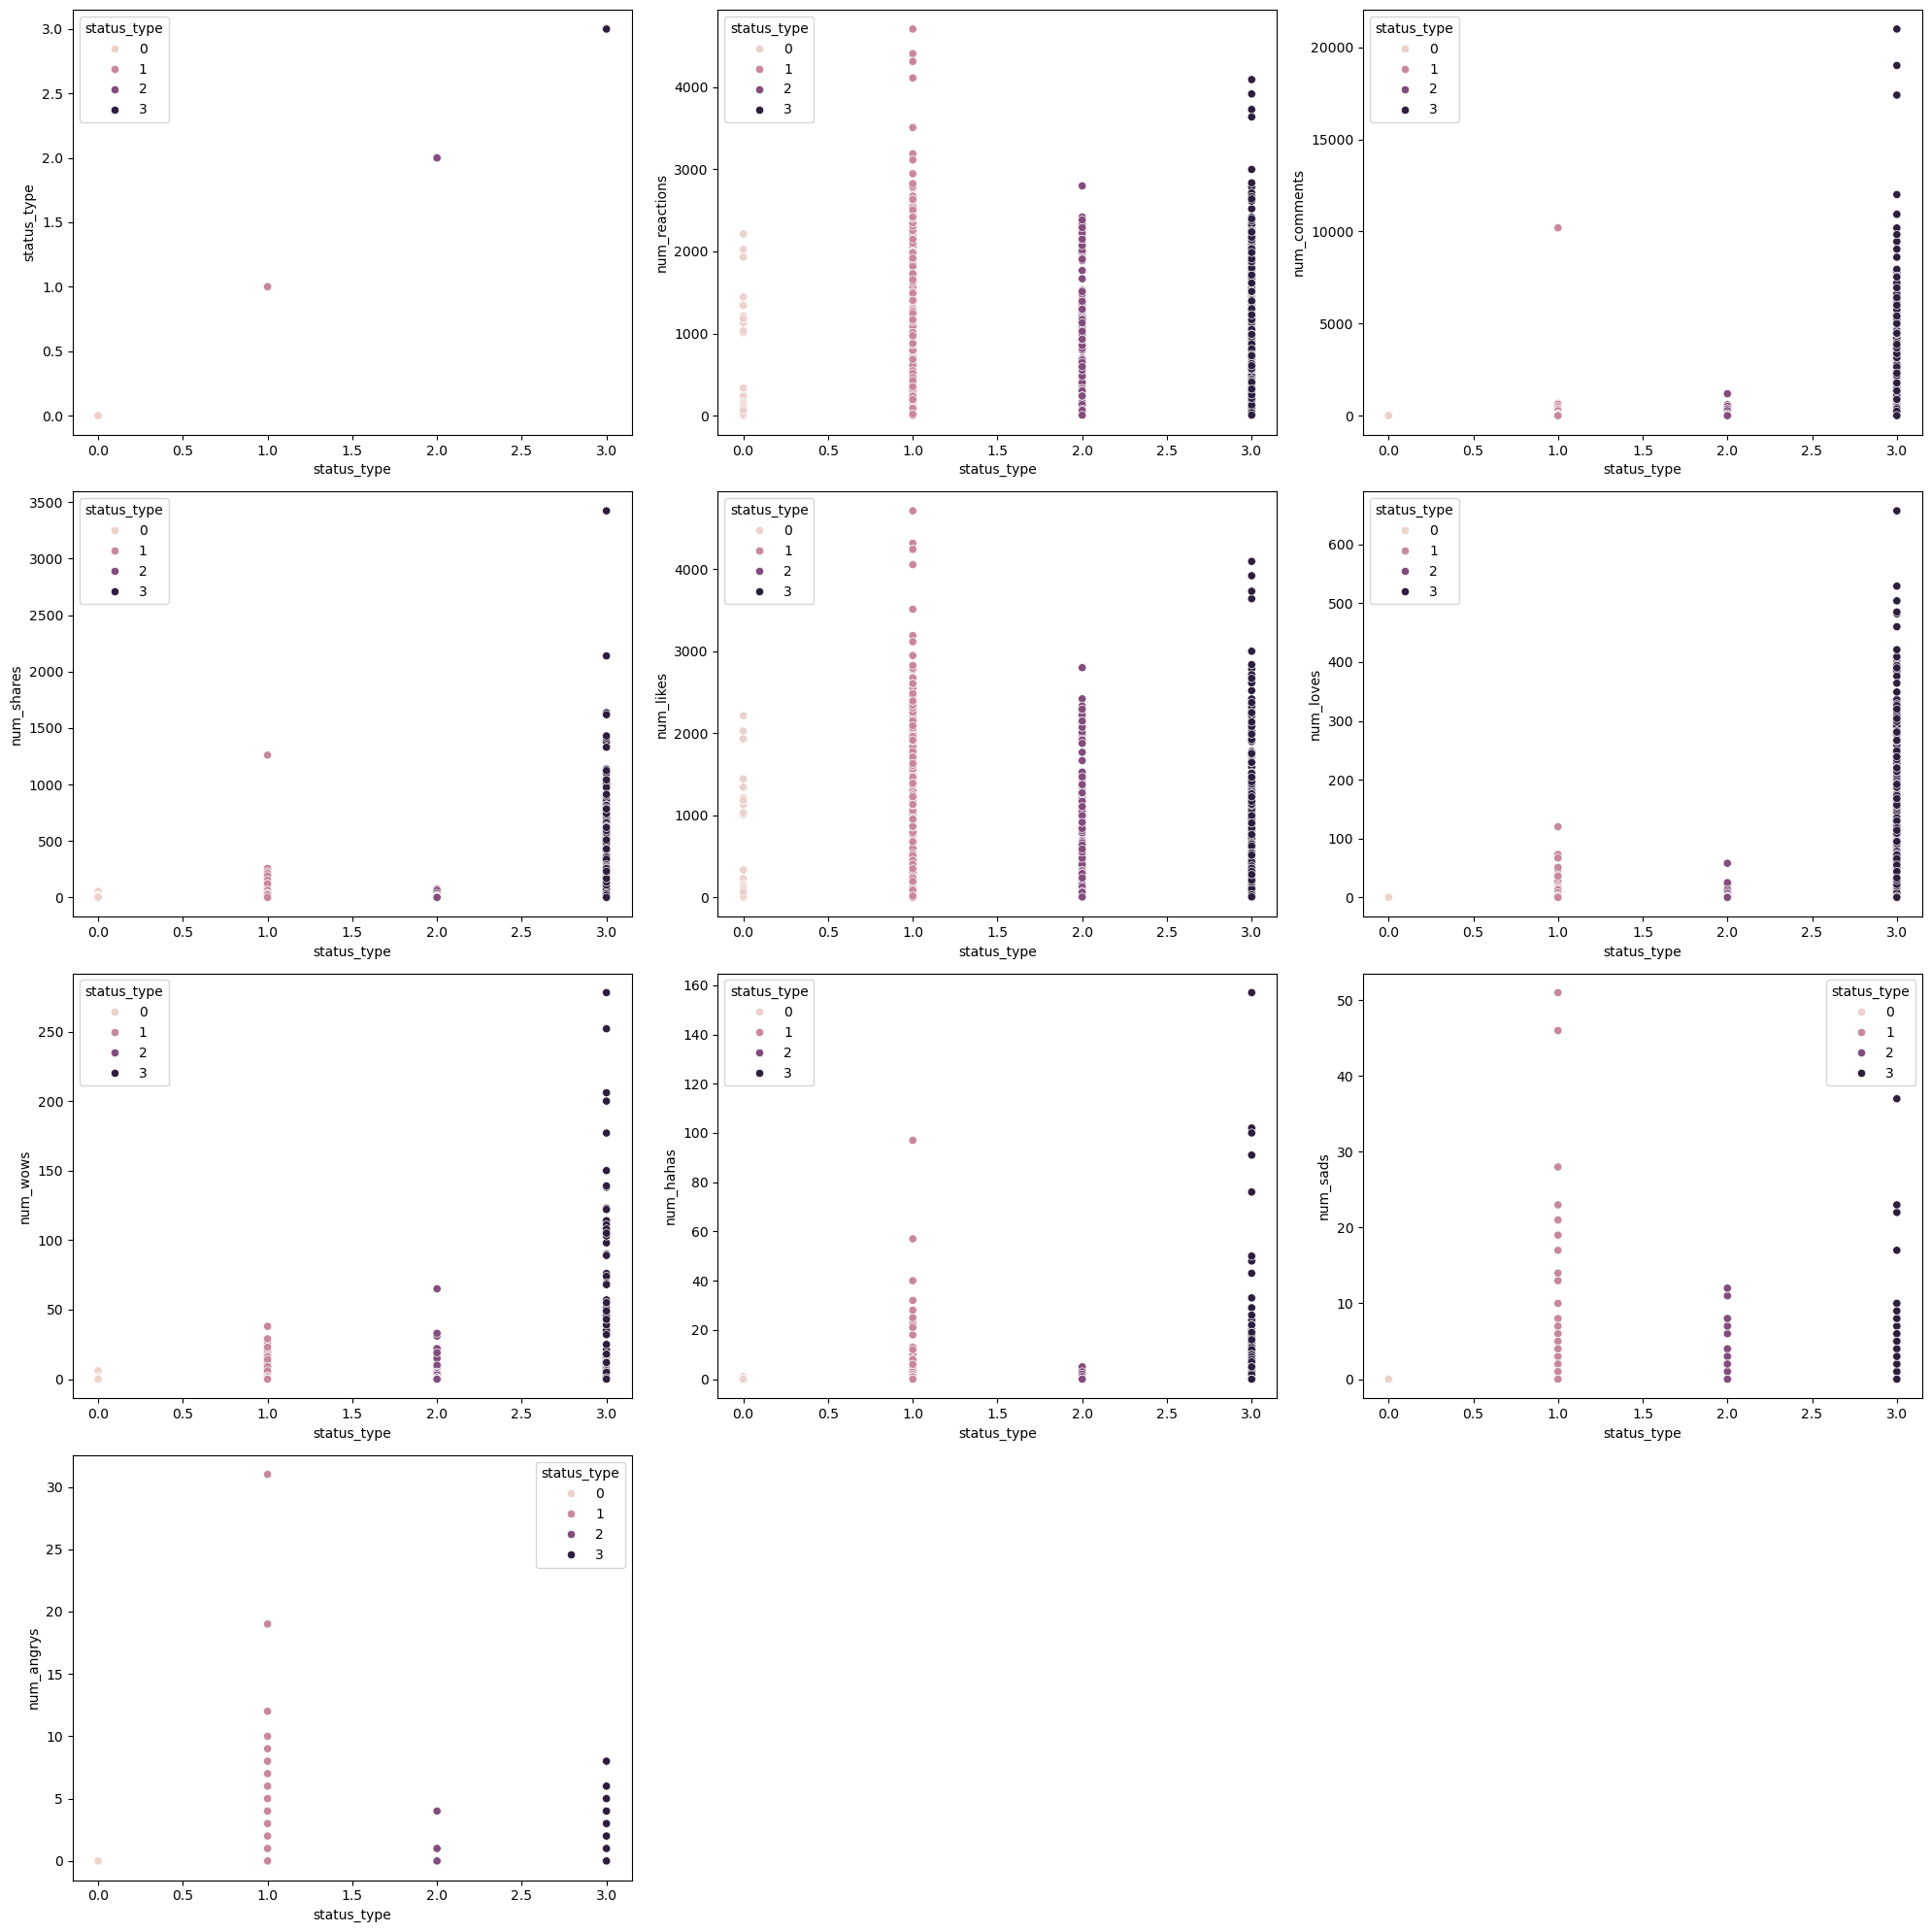

In [243]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
plot = 1
for i in data.columns[:10]:  
    ax = plt.subplot(4, 3, plot)
    sns.scatterplot(x=data['status_type'], y=data[i],hue=data['status_type'])
    plt.xlabel('status_type')
    plt.ylabel(i)
    plot += 1
plt.tight_layout()
plt.show()

In [244]:
la=data['status_type']
la

0       3
1       1
2       3
3       1
4       1
       ..
7045    1
7046    1
7047    1
7048    1
7049    1
Name: status_type, Length: 7050, dtype: int64

In [245]:
#feature Scaling
cols = X.columns

In [246]:
ms = MinMaxScaler()
data1 = ms.fit_transform(data)

In [247]:
data2 = pd.DataFrame(data1, columns=[cols])

In [248]:
data2.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [249]:
#K-Means model with two clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,init='k-means++', n_init=10, random_state=0) 
kmeans.fit(data2)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [250]:
#K-Means model parameters
#The cluster_centers_ will give the coordinates of the centroids for each cluster.
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

In [251]:
kmeans.inertia_

237.75726404419564

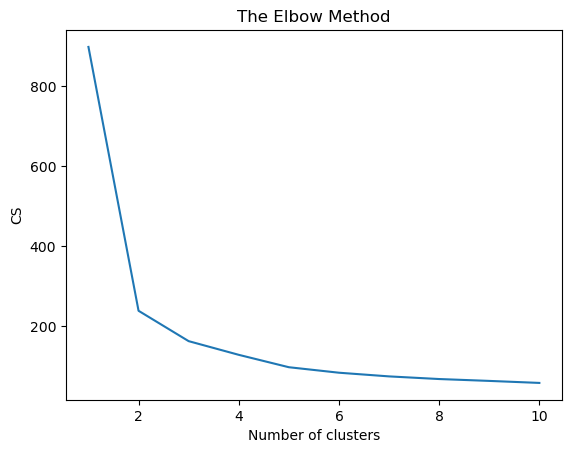

In [252]:
#We have achieved a classification accuracy of 61% by our unsupervised model.
#Use elbow method to find optimal number of clusters 
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data2)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [253]:
#inertia is very high so, this is not a good model.
#The lesser the model inertia, the better the model fit.
#Check quality of weak classification by the model
#The labels will contain the cluster assignment for each point in X.
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(la == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, la.size))

Result: 0 out of 7050 samples were correctly labeled.


In [254]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(la.size)))

Accuracy score: 0.00


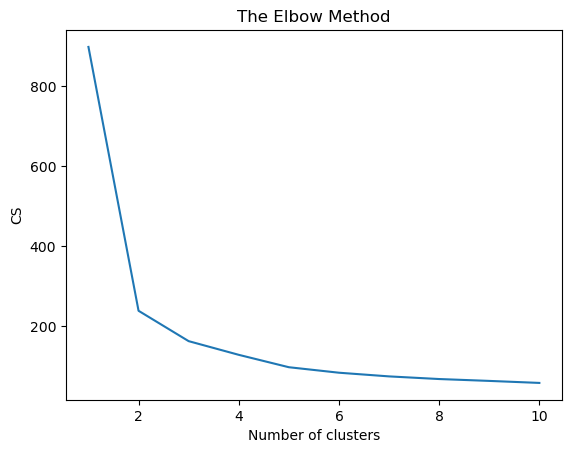

In [255]:
#We have achieved a classification accuracy of 61% by our unsupervised model.
#Use elbow method to find optimal number of clusters 
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data2)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [256]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(data2)
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(la == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, la.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(la.size)))

Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


In [257]:
#K-Means model with different clusters
#K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(data2)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(la == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, la.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(la.size)))

Result: 4066 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


In [258]:
#K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(data2)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(la == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, la.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(la.size)))

Result: 4112 out of 7050 samples were correctly labeled.
Accuracy score: 0.58
